In [37]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\IT
[nltk_data]     SHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\IT
[nltk_data]     SHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\IT
[nltk_data]     SHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('Amazon Customer Reviews.csv')

In [4]:
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [5]:
df.isnull().any()

Id                        False
ProductId                 False
UserId                    False
ProfileName                True
HelpfulnessNumerator      False
HelpfulnessDenominator    False
Score                     False
Time                      False
Summary                    True
Text                      False
dtype: bool

In [6]:
df.dropna(subset=['ProfileName', 'Summary'], inplace=True)

In [7]:
df.duplicated().sum()

0

In [4]:
del df['Id']
del df['ProductId']
del df['UserId']
del df['ProfileName']
del df['HelpfulnessNumerator']
del df['HelpfulnessDenominator']
del df['Time']
del df['Summary']

In [5]:
df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [6]:
# df['text'] = df['Text'] + ' ' + df['Summary']
# del df['Text']
# del df['Summary']

In [7]:
df['Score'] = df['Score'].astype(int)

In [8]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    #text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = text.strip()
    return text

In [9]:
df['cleaned_text'] = df['Text'].apply(clean_text)

In [39]:
def tokenize_text(text):
    # Tokenize using NLTK's word_tokenize
    tokens = word_tokenize(text)
    return tokens

In [79]:
# Apply tokenization
df['tokens'] = df['cleaned_text'].apply(tokenize_text)


In [80]:
# Display a sample of tokenized data
print(df[['cleaned_text', 'tokens']].head())

                                        cleaned_text  \
0  i have bought several of the vitality canned d...   
1  product arrived labeled as jumbo salted peanut...   
2  this is a confection that has been around a fe...   
3  if you are looking for the secret ingredient i...   
4  great taffy at a great price  there was a wide...   

                                              tokens  
0  [i, have, bought, several, of, the, vitality, ...  
1  [product, arrived, labeled, as, jumbo, salted,...  
2  [this, is, a, confection, that, has, been, aro...  
3  [if, you, are, looking, for, the, secret, ingr...  
4  [great, taffy, at, a, great, price, there, was...  


In [40]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

In [ ]:
df['tokens_no_stopwords'] = df['tokens'].apply(remove_stopwords)

In [41]:
stemmer = PorterStemmer()

def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

In [ ]:
df['stemmed_tokens'] = df['tokens_no_stopwords'].apply(stem_tokens)

In [83]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\IT
[nltk_data]     SHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

In [11]:
# Apply sentiment analysis and add as a new column
df["Polarity_score"] = df["cleaned_text"].apply(lambda x: sia.polarity_scores(x)['compound'])

In [12]:
# Optionally, classify the sentiment based on score
df["sentiment_label"] = df["Polarity_score"].apply(
    lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "Neutral"
)

In [13]:
print(df[['Score', 'Polarity_score', 'sentiment_label']])

        Score  Polarity_score sentiment_label
0           5          0.9441        Positive
1           1         -0.5664        Negative
2           4          0.8265        Positive
3           2          0.0000         Neutral
4           5          0.9468        Positive
...       ...             ...             ...
568449      5          0.8589        Positive
568450      2         -0.4848        Negative
568451      5          0.4352        Positive
568452      5          0.9690        Positive
568453      5          0.4754        Positive

[568454 rows x 3 columns]


# comparison between the generated sentiment labels and the original ones

In [14]:
def categorize_rating(star):
    if star >= 4:
        return 'Positive'
    elif star == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['original_sentiment'] = df['Score'].apply(categorize_rating)

In [15]:
print(df[['Score','original_sentiment', 'sentiment_label']])

        Score original_sentiment sentiment_label
0           5           Positive        Positive
1           1           Negative        Negative
2           4           Positive        Positive
3           2           Negative         Neutral
4           5           Positive        Positive
...       ...                ...             ...
568449      5           Positive        Positive
568450      2           Negative        Negative
568451      5           Positive        Positive
568452      5           Positive        Positive
568453      5           Positive        Positive

[568454 rows x 3 columns]


In [16]:
df['match'] = df['original_sentiment'] == df['sentiment_label']

In [17]:
print(df[['match']])

        match
0        True
1        True
2        True
3       False
4        True
...       ...
568449   True
568450   True
568451   True
568452   True
568453   True

[568454 rows x 1 columns]


In [18]:
comparison = df['match'].value_counts()

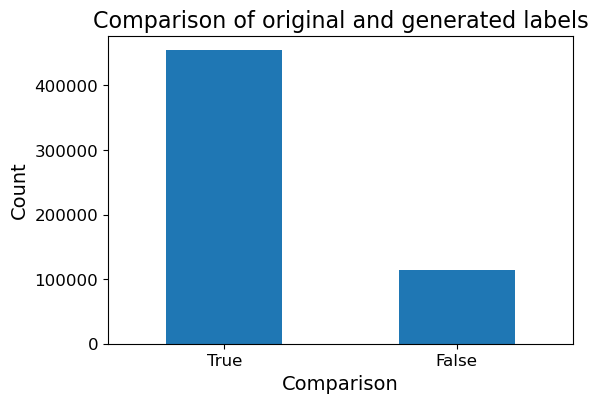

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  
comparison.plot(kind='bar')  

plt.title('Comparison of original and generated labels', fontsize=16)
plt.xlabel('Comparison', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [20]:
# Count the number of False values in 'Sentiment_Error' column
false_count = (df['match'] == False).sum()

print(f'Number of False values: {false_count}')

Number of False values: 114261


In [21]:
# Count the number of False values in 'Sentiment_Error' column
true_count = (df['match'] == True).sum()

print(f'Number of true values: {true_count}')

Number of true values: 454193


In [22]:
# Calculate accuracy based on the number of False values (correct sentiment labels)
accuracy = (df['match'] == True).mean()

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 79.90%


# comparison between the generated stars and the original ones

In [23]:
def polarity_to_label(polarity):
    if polarity > 0:
        return 5 # Positive
    elif polarity < 0:
        return 1  # Negative
    else:
        return 3  # Neutral


df['generated_Score'] = df['Polarity_score'].apply(polarity_to_label)

In [24]:
def score_to_label(score):
    if score <= 2:
        return 1  # Negative
    elif score == 3:
        return 3 # Neutral
    else:
        return 5 # Positive

df['original_Score'] = df['Score'].apply(score_to_label)

In [25]:
df.columns

Index(['Score', 'Text', 'cleaned_text', 'Polarity_score', 'sentiment_label',
       'original_sentiment', 'match', 'generated_Score', 'original_Score'],
      dtype='object')

In [26]:
print(df[['original_Score', 'original_sentiment', 'sentiment_label', 'generated_Score']])

        original_Score original_sentiment sentiment_label  generated_Score
0                    5           Positive        Positive                5
1                    1           Negative        Negative                1
2                    5           Positive        Positive                5
3                    1           Negative         Neutral                3
4                    5           Positive        Positive                5
...                ...                ...             ...              ...
568449               5           Positive        Positive                5
568450               1           Negative        Negative                1
568451               5           Positive        Positive                5
568452               5           Positive        Positive                5
568453               5           Positive        Positive                5

[568454 rows x 4 columns]


In [27]:
df['original_Score'].value_counts()

original_Score
5    443777
1     82037
3     42640
Name: count, dtype: int64

In [28]:
original_score = df['original_Score'].value_counts()

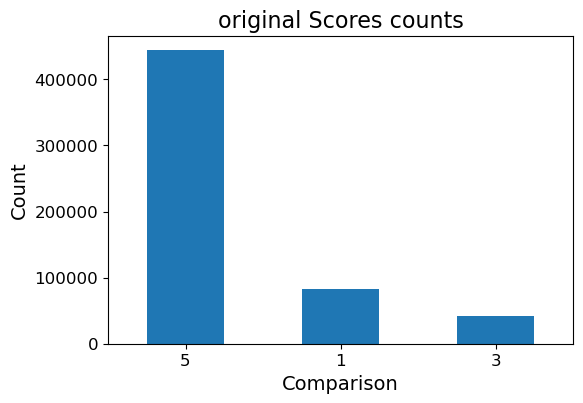

In [29]:
plt.figure(figsize=(6, 4))  
original_score.plot(kind='bar')  

plt.title('original Scores counts', fontsize=16)
plt.xlabel('Comparison', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [30]:
df['generated_Score'].value_counts()

generated_Score
5    498914
1     61511
3      8029
Name: count, dtype: int64

In [31]:
generated_score = df['generated_Score'].value_counts()

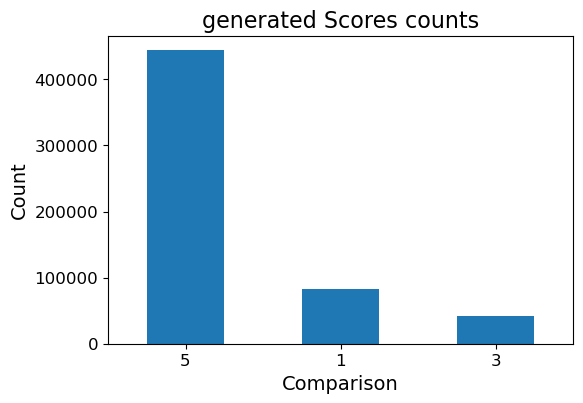

In [32]:
plt.figure(figsize=(6, 4))  
original_score.plot(kind='bar')  

plt.title('generated Scores counts', fontsize=16)
plt.xlabel('Comparison', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [33]:
# Calculate the accuracy of the generated stars compared to the original stars
correct_predictions = (df['original_Score'] == df['generated_Score']).sum()
total_predictions = len(df)

accuracy = correct_predictions / total_predictions * 100

# Display the results
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 79.90%


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['generated_Score'], test_size=0.2, random_state=42)

In [55]:
tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

C:\Users\IT SHOP\.anaconda\jup\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
y_pred = model.predict(X_test_tfidf)

In [58]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

acc=accuracy_score(y_test,y_pred)
print(acc)

0.9221750182512248


In [59]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.54      0.62     12356
           3       0.83      0.35      0.49      1559
           5       0.94      0.98      0.96     99776

    accuracy                           0.92    113691
   macro avg       0.84      0.62      0.69    113691
weighted avg       0.92      0.92      0.92    113691



In [36]:
# Select a sentence from the dataset based on user input
user_input_index = int(input("Enter the sentence index you want to analyze from the dataset: "))

# Validate the input
if user_input_index < 0 or user_input_index >= len(df):
    print("Index out of range. Please enter a valid index.")
else:
    # Extract the original text
    original_text = df.iloc[user_input_index]['cleaned_text']

    # Extract the original score
    original_score = df.iloc[user_input_index]['Score']

    # Extract the original sentiment
    original_sentiment = df.iloc[user_input_index]['original_sentiment']

    # Predict stars based on calculated sentiment
    generated_Score = df.iloc[user_input_index]['generated_Score']

    # Predict sentiment based on the sentence
    sentiment_label = df.iloc[user_input_index]['sentiment_label']

    # Display the results
    print("\nAnalysis Results:")
    print(f"Text: {original_text}")
    print(f"Original Stars: {original_score}")
    print(f"Original Sentiment: {original_sentiment}")
    print(f"Predicted Stars: {generated_Score}")
    print(f"Predicted Sentiment: {sentiment_label}")

    # Compare stars and sentiment
    stars_match = "Match" if original_score == generated_Score else "Mismatch"
    sentiment_match = "Match" if original_sentiment == sentiment_label else "Mismatch"

    print("\nComparison Results:")
    print(f"Stars Match: {stars_match}")
    print(f"Sentiment Match: {sentiment_match}")

    # Check overall match
    if stars_match == "Match" and sentiment_match == "Match":
        print("\nThe prediction matches perfectly with the original data.")
    else:
        print("\nThere is a discrepancy between the predictions and the original data.")

Enter the sentence index you want to analyze from the dataset: 235468

Analysis Results:
Text: my  year old son loves these cereal bars and the cherry vanilla is the best flavor if youre used to eating a lot of junk foods that have altered your taste buds then you may not like the taste of these cereal bars but i wanted a cereal bar for my son with more fiber protein and flavor these were perfect the strawberry and blackberry flavors arent sweet enough for me but my son loves all of them i havent found these at my local safeway in a long time so maybe this flavor is discontinued which explains the greedy price
Original Stars: 4
Original Sentiment: Positive
Predicted Stars: 5
Predicted Sentiment: Positive

Comparison Results:
Stars Match: Mismatch
Sentiment Match: Match

There is a discrepancy between the predictions and the original data.


In [36]:
df.head()

,Score,Text,cleaned_text,Polarity_score,sentiment_label,original_sentiment,match,generated_Score,original_Score
0,5,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,0.9441,Positive,Positive,True,5,5
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,-0.5664,Negative,Negative,True,1,1
2,4,This is a confection that has been around a fe...,this is a confection that has been around a fe...,0.8265,Positive,Positive,True,5,5
3,2,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,0.0000,Neutral,Negative,False,3,1
4,5,Great taffy at a great price. There was a wid...,great taffy at a great price. there was a wid...,0.9468,Positive,Positive,True,5,5


In [35]:
# Select a sentence from the dataset based on user input
user_input_index = int(input("Enter the sentence index you want to analyze from the dataset: "))

# Validate the input
if user_input_index < 0 or user_input_index >= len(df):
    print("Index out of range. Please enter a valid index.")
else:
    # Extract the original text
    original_text = df.iloc[user_input_index]['cleaned_text']

    # Extract the original score from original_Score column
    original_score = df.iloc[user_input_index]['original_Score']

    # Extract the original sentiment
    original_sentiment = df.iloc[user_input_index]['original_sentiment']

  # Predict stars based on calculated sentiment
    generated_Score = df.iloc[user_input_index]['generated_Score']

    # Predict sentiment based on the sentence
    sentiment_label = df.iloc[user_input_index]['sentiment_label']

    # Display the results
    print("\nAnalysis Results:")
    print(f"Text: {original_text}")
    print(f"Original Stars: {original_score}")
    print(f"Original Sentiment: {original_sentiment}")
    print(f"Predicted Stars: {generated_Score}")
    print(f"Predicted Sentiment: {sentiment_label}")

    # Compare stars and sentiment
    stars_match = "Match" if original_score == generated_Score else "Mismatch"
    sentiment_match = "Match" if original_sentiment == sentiment_label else "Mismatch"

    print("\nComparison Results:")
    print(f"Stars Match: {stars_match}")
    print(f"Sentiment Match: {sentiment_match}")

    # Check overall match
    if stars_match == "Match" and sentiment_match == "Match":
        print("\nThe prediction matches perfectly with the original data.")
    else:
        print("\nThere is a discrepancy between the predictions and the original data.")


Enter the sentence index you want to analyze from the dataset: 325987

Analysis Results:
Text: at a time when local crops are failing due to the drought i'm stocking up on canned vegetables. this is a tasty and economical choice. it's not like eating fresh corn on the cob but will do just fine in a pinch. all cans were in great shape, but if they weren't customer service would get a call about my dissatisfaction.
Original Stars: 5
Original Sentiment: Positive
Predicted Stars: 5
Predicted Sentiment: Positive

Comparison Results:
Stars Match: Match
Sentiment Match: Match

The prediction matches perfectly with the original data.


In [60]:
import joblib

# After training the model
joblib.dump(model, 'logistic_regression_model.pkl')   # Save model
joblib.dump(tfidf, 'tfidf_vectorizer.pkl') 

['tfidf_vectorizer.pkl']